# Assignment 4 (Conversational AI: DS [Basics])
> This assignment is solved by:-
* Name: Vishal Sehgal
* Group: CO11
* Roll Number: 102003265

### Question 1

> a.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = [['sunny', 85, 85, False, 'no'],
        ['sunny', 80, 90, True, 'no'],
        ['overcast', 83, 78, False, 'yes'],
        ['rain', 70, 96, False, 'yes'],
        ['rain', 68, 80, False, 'yes'],
        ['rain', 65, 70, True, 'no'],
        ['overcast', 64, 65, True, 'yes'],
        ['sunny', 72, 95, False, 'no'],
        ['sunny', 69, 70, False, 'yes'],
        ['rain', 75, 80, False, 'yes'],
        ['sunny', 75, 70, True, 'yes'],
        ['overcast', 72, 90, True, 'yes'],
        ['overcast', 81, 75, False, 'yes'],
        ['rain', 71, 80, True, 'no']
        ]

In [3]:
df = pd.DataFrame(data, columns=['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play'])

In [4]:
df.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,78,False,yes
3,rain,70,96,False,yes
4,rain,68,80,False,yes


In [5]:
df.to_csv('weather.csv', index=False)

In [6]:
df.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play'], dtype='object')

In [7]:
def create_table(df, colname, val):
    uniq_val = df[df.columns[-1]].unique()
    table = []
    for u_val in uniq_val:
        sub = []
        temp = df[df[colname] <= val]
        sub.append(len(temp[temp[temp.columns[-1]]==u_val]))
        temp2 = df[df[colname] > val]
        sub.append(len(temp2[temp2[temp2.columns[-1]]==u_val]))
        table.append(sub)
    return table

In [8]:
def prob_table(table):
    table = table.astype(np.float)
    for i in range(len(table)):
        s = sum(table[i])
        for j in range(len(table[i])):
            table[i][j] = table[i][j]/s
    return table

In [9]:
def ent(df):
    val = df.unique()
    prob = []
    for i in val:
        prob.append(len(df[df==i])/len(df))
    entropy = 0
    for i in range(len(val)):
        entropy += -1 * prob[i] * np.log2(prob[i])
    return entropy

In [10]:
def find_entropy_2(table):
    entropy = []
    for i in range(len(table)):
        e = 0
        for j in range(len(table[i])):
            e += -1 * table[i][j] * np.log2(table[i][j] + 1e-7)
        entropy.append(e)
    return entropy

In [11]:
def gain_ratio_cnts(df, colname, val):
    table = create_table(df, colname, val)
    table = np.array(table)
    table = table.T
    p_table = prob_table(table)
    entropy = find_entropy_2(p_table)
    avg_info_gain = 0
    for i in range(len(table)):
        s = sum(table[i])/sum(sum(table))
        avg_info_gain += s * entropy[i]
    info_gain = ent(df[df.columns[-1]]) - avg_info_gain
    split_info = 0
    for i in range(len(table)):
        s = sum(table[i])/sum(sum(table))
        split_info += -1 * s * np.log2(s + 1e-7)
    return info_gain/split_info

In [12]:
from math import isnan

In [13]:
def find_threshold(df, colname):
    unq = df[colname].unique()
    dict = {}
    for i in unq:
        s = gain_ratio_cnts(df, colname, i)
        if isnan(s):
            continue
        dict[i] = s
    return max(dict, key=dict.get)

In [14]:
encode_humidity = find_threshold(df, 'Humidity')

<ipython-input-8-cadbfe0a5307>:6: RuntimeWarning: invalid value encountered in double_scalars
  table[i][j] = table[i][j]/s


In [15]:
encode_temp = find_threshold(df, 'Temperature')

<ipython-input-8-cadbfe0a5307>:6: RuntimeWarning: invalid value encountered in double_scalars
  table[i][j] = table[i][j]/s


In [16]:
df2 = df.reset_index(drop=True)

In [17]:
df2.loc[df2['Humidity'] <= encode_humidity, 'Humidity'] = 0
df2.loc[df2['Humidity'] > encode_humidity, 'Humidity'] = 1

In [18]:
df2['Humidity'].unique()

array([1, 0])

In [19]:
df2.loc[df2['Temperature'] <= encode_temp, 'Temperature'] = 0
df2.loc[df2['Temperature'] > encode_temp, 'Temperature'] = 1

In [20]:
df2.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,1,1,False,no
1,sunny,0,1,True,no
2,overcast,0,1,False,yes
3,rain,0,1,False,yes
4,rain,0,1,False,yes


> b.

In [22]:
def find_entropy(df):
    Class=df.keys()[-1]
    values=df[Class].unique()
    entropy=0
    for value in values:
        prob=len(df[df[Class]==value])/len(df[Class])
        entropy+=-prob*np.log2(prob)
    return entropy

In [23]:
def find_information_entropy(df,attribute):
    Class=df.keys()[-1]
    labels=df[Class].unique()
    attr_values=df[attribute].unique()
    avg_entropy=0
    for value1 in attr_values:
        entropy_subsample=0
        for value2 in labels:
            num=len(df[attribute][df[attribute]==value1][df[Class]==value2])
            den=len(df[attribute][df[attribute]==value1])
            prob=num/den
            entropy_subsample+=-(prob*np.log2(prob+1e-7))
        weight=den/len(df)
        avg_entropy+=weight*entropy_subsample
    return avg_entropy

In [24]:
def find_split_info(df, attribute):
    attr_values = df[attribute].unique()
    split_info = 0
    for value1 in attr_values:
        den = len(df[attribute][df[attribute]==value1])
        weight = den/len(df)
        split_info += -1 * weight * np.log2(weight + 1e-7)
    return split_info


In [25]:
def find_winner(df):
    GR = []
    for attribute in df.keys()[:-1]:
        IG = find_entropy(df)-find_information_entropy(df,attribute)
        SI = find_split_info(df, attribute)
        GR.append(IG/SI)
    return df.keys()[:-1][np.argmax(GR)]

In [69]:
def training(df,tree=None):
    Class=df.keys()[-1]
    df2 = df.copy()
    if 'Humidity' in df.columns:
        encode_humidity = find_threshold(df2, 'Humidity')
        df2.loc[df2['Humidity'] <= encode_humidity, 'Humidity'] = 0
        df2.loc[df2['Humidity'] > encode_humidity, 'Humidity'] = 1
    if 'Temperature' in df.columns:
        encode_temp = find_threshold(df2, 'Temperature')
        df2.loc[df2['Temperature'] <= encode_temp, 'Temperature'] = 0
        df2.loc[df2['Temperature'] > encode_temp, 'Temperature'] = 1
    split_attr=find_winner(df2)
    split_attr_values=df2[split_attr].unique()
    if tree is None:
        tree={}
        tree[split_attr]={}
    for value in split_attr_values:
        sub_df=df[df2[split_attr]==value].reset_index(drop=True)
        sub_df.drop(split_attr, axis=1, inplace=True)
        Clvalue=sub_df[Class].unique()
        if len(Clvalue)==1:
            if(split_attr=='Humidity'):
                tree[split_attr][">"+np.str(encode_humidity)] = Clvalue[0]
            elif(split_attr=='Temperature'):
                tree[split_attr][">"+np.str(encode_temp)] = Clvalue[0]
            else:
                tree[split_attr][value]=Clvalue[0]
        else:
            if(split_attr=='Humidity'):
                tree[split_attr]["<"+np.str(encode_humidity)] = training(sub_df)
            elif(split_attr=='Temperature'):
                tree[split_attr]["<"+np.str(encode_temp)] = training(sub_df)
            else:
                tree[split_attr][value] = training(sub_df)
    return tree

In [70]:
tree = training(df)

<ipython-input-8-cadbfe0a5307>:6: RuntimeWarning: invalid value encountered in double_scalars
  table[i][j] = table[i][j]/s
<ipython-input-8-cadbfe0a5307>:6: RuntimeWarning: invalid value encountered in double_scalars
  table[i][j] = table[i][j]/s
<ipython-input-8-cadbfe0a5307>:6: RuntimeWarning: invalid value encountered in double_scalars
  table[i][j] = table[i][j]/s
<ipython-input-8-cadbfe0a5307>:6: RuntimeWarning: invalid value encountered in double_scalars
  table[i][j] = table[i][j]/s
<ipython-input-8-cadbfe0a5307>:6: RuntimeWarning: invalid value encountered in double_scalars
  table[i][j] = table[i][j]/s


In [72]:
def visualize(root, indent=0):
    if type(root) == dict:
        for k, v in root.items():
            print(" "*indent + f"{k}:")
            visualize(v, indent+2)
    else:
        print(" "*indent + repr(root))
visualize(tree)

Temperature:
  >83:
    'no'
  <83:
    Outlook:
      sunny:
        Humidity:
          >70:
            'yes'
      overcast:
        'yes'
      rain:
        Windy:
          False:
            'yes'
          True:
            'no'


> c

In [76]:
def two_best_attr(df):
    GR = []
    for attribute in df.keys()[:-1]:
        IG = find_entropy(df)-find_information_entropy(df,attribute)
        SI = find_split_info(df, attribute)
        GR.append(IG/SI)
    col1 = df.keys()[:-1][np.argmax(GR)]
    GR.pop(np.argmax(GR))
    col2 = df.keys()[:-1][np.argmax(GR)]
    return (col1, col2)

In [77]:
two_best_attr(df2)

('Temperature', 'Outlook')

> d

In [82]:
from sklearn.preprocessing import LabelEncoder
outlook = LabelEncoder().fit_transform(df['Outlook'])
play = LabelEncoder().fit_transform(df['Play'])

In [95]:
from scipy.stats import chi2_contingency

data = [outlook, play]
stat, p, dof, expected = chi2_contingency(data)
alpha = 0.05
if p <= alpha:
    print('Play Label depends upon outlook under 95% confidence Level')
else:
    print('Play Label doesnot depends upon outlook under 95% confidence level')

Play Label doesnot depends upon outlook under 95% confidence level


In [94]:
chi2_contingency(data)

(11.91111111111111,
 0.53494591833807,
 13,
 array([[1.25 , 1.25 , 0.625, 1.25 , 1.25 , 0.625, 0.625, 1.25 , 1.875,
         1.25 , 1.875, 0.625, 0.625, 0.625],
        [0.75 , 0.75 , 0.375, 0.75 , 0.75 , 0.375, 0.375, 0.75 , 1.125,
         0.75 , 1.125, 0.375, 0.375, 0.375]]))

### Question 2

In [97]:
from collections import defaultdict

In [110]:
def pmi(df, positive=True):
    col_totals = df.sum(axis=0)
    total = col_totals.sum()
    row_totals = df.sum(axis=1)
    expected = np.outer(row_totals, col_totals) / total
    df = df / expected
    # Silence distracting warnings about log(0):
    with np.errstate(divide='ignore'):
        df = np.log(df)
    df[np.isinf(df)] = 0.0  # log(0) = 0
    if positive:
        df[df < 0] = 0.0
    return df

In [100]:
df = pd.read_csv('./IMDB_Dataset.csv')
corpus = np.array(df['review'])
corpus = corpus[:100].tolist()

In [105]:
lower = []
for i in corpus:
    lower.append(' '.join([word.lower() for word in i.split()]))
alpha = []
for i in lower:
    alpha.append(' '.join([word for word in i.split() if word.isalpha()]))

tokenize = []
from nltk.tokenize import word_tokenize
for i in alpha:
    tokenize.append(word_tokenize(i))

import nltk
from nltk.corpus import *
stopword = nltk.corpus.stopwords.words('english')
no_stop = []
for i in tokenize:
    no_stop.append([word for word in i if word not in stopword])

final = []
from nltk.stem import PorterStemmer
ps = PorterStemmer()
for i in no_stop:
    final.append(' '.join([ps.stem(word) for word in i]))


In [112]:
doc_count={}
for i in range(len(final)):
    word_count={}
    for word in final[i].split():
        if word not in word_count.keys():
            word_count[word]=1
    doc_count[i]=word_count
binary_tdm_scratch=pd.DataFrame(doc_count)
binary_tdm_scratch.fillna(0,inplace=True)

In [113]:
co_occur_matrix=np.dot(binary_tdm_scratch.values,binary_tdm_scratch.values.T)
np.fill_diagonal(co_occur_matrix,0)
co_occur_matrix=pd.DataFrame(co_occur_matrix, index=binary_tdm_scratch.index, columns=binary_tdm_scratch.index)
co_occur_matrix

,one,review,mention,watch,oz,episod,exactli,happen,first,thing,...,spin,primari,activ,pointer,enemi,object,gripe,upsid,restart,superb
one,0.0,2.0,2.0,16.0,1.0,2.0,5.0,4.0,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
review,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mention,2.0,1.0,0.0,3.0,1.0,1.0,1.0,2.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
watch,16.0,1.0,3.0,0.0,1.0,1.0,1.0,3.0,6.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
oz,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
object,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
gripe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
upsid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
restart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [115]:
ppmi = pmi(co_occur_matrix)

In [134]:
data = ppmi.iloc[:500, :500]

In [141]:
from numpy.linalg import svd

U, S, VT = svd(data)

embedding = U.dot(S)
print(embedding.shape)

(500,)


### Question 3

(4, 4)
(150, 2)


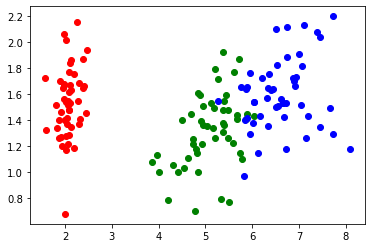

Original Data Size: (150, 4) 
Modified Data Size: (150, 2)


In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
class LDA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eig_vectors = None
    def transform(self,X,y):
        height, width = X.shape
        unique_classes = np.unique(y)
        num_classes = len(unique_classes)
        scatter_t = np.cov(X.T)*(height - 1)
        scatter_w = 0
        for i in range(num_classes):
            class_items = np.flatnonzero(y == unique_classes[i])
            scatter_w = scatter_w + np.cov(X[class_items].T) * (len(class_items)-1)
        scatter_b = scatter_t - scatter_w
        _, eig_vectors = np.linalg.eigh(np.linalg.pinv(scatter_w).dot(scatter_b))
        print(eig_vectors.shape)
        pc = X.dot(eig_vectors[:,::-1][:,:self.n_components])
        print(pc.shape)
        if self.n_components == 2:
            if y is None:
                plt.scatter(pc[:,0],pc[:,1])
            else:
                colors = ['r','g','b']
                labels = np.unique(y)
                for color, label in zip(colors, labels):
                    class_data = pc[np.flatnonzero(y==label)]
                    plt.scatter(class_data[:,0],class_data[:,1],c=color)
            plt.show()
        return pc
LDA_obj = LDA(n_components=2)
data = load_iris()
X, y = data.data, data.target
LDA_object = LDA(n_components=2)
X_modified = LDA_object.transform(X, y)
print("Original Data Size:",X.shape, "\nModified Data Size:", X_modified.shape)

### Question 4

> 1.

In [337]:
df = pd.read_csv('./imports-85.data', names=["symboling", "normalized_losses", "make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height", "curb_weight", "engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"])

In [338]:
df = df.replace('?', np.nan)

In [339]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


> 2.

In [340]:
df = df.dropna(subset=['price'])

In [341]:
from sklearn.preprocessing import LabelEncoder

In [342]:
for col in df.columns:
    if(np.dtype(df[col])!='object'):
        df.loc[df[col]==np.nan, col] = np.median(df[col])

> 3.

In [343]:
from sklearn.ensemble import IsolationForest

In [344]:
np.dtype(df['length'])

dtype('float64')

In [345]:
forest = IsolationForest(random_state=42)
forest.fit(np.array(df['length']).reshape(-1, 1))

IsolationForest(random_state=42)

In [346]:
arr = forest.predict(np.array(df['length']).reshape(-1, 1))

In [347]:
df = df.reset_index(drop=True)

In [348]:
for i in range(len(arr)):
    if(arr[i]==-1):
        df.drop(i, axis=0, inplace=True)

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          154 non-null    float64
 1   normalized_losses  134 non-null    object 
 2   make               154 non-null    object 
 3   fuel_type          154 non-null    object 
 4   aspiration         154 non-null    object 
 5   num_doors          152 non-null    object 
 6   body_style         154 non-null    object 
 7   drive_wheels       154 non-null    object 
 8   engine_location    154 non-null    object 
 9   wheel_base         154 non-null    float64
 10  length             154 non-null    float64
 11  width              154 non-null    float64
 12  height             154 non-null    float64
 13  curb_weight        154 non-null    float64
 14  engine_type        154 non-null    object 
 15  num_cylinders      154 non-null    object 
 16  engine_size        154 non

> 4.

In [350]:
df = df.reset_index(drop=True)

In [351]:
# i.
help_dict = {
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'zero': 0,
    np.nan: np.nan
}
num_doors = [help_dict[word] for word in df['num_doors']]
num_cylinders = [help_dict[word] for word in df['num_cylinders']]
df['num_doors'] = num_doors
df['num_cylinders'] = num_cylinders

In [352]:
# ii.
body_style = pd.get_dummies(df['body_style'])
drive_wheels = pd.get_dummies(df['drive_wheels'])
df = pd.concat([df, body_style], axis=1)
df = pd.concat([df, drive_wheels], axis=1)
df.drop('body_style', axis=1, inplace=True)
df.drop('drive_wheels', axis=1, inplace=True)

In [353]:
# iii.
from sklearn.preprocessing import LabelEncoder
li = ["make", "aspiration", "engine_location","fuel_type"]
for l in li:
    df[l] = LabelEncoder().fit_transform(df[l])

In [354]:
# iv.
df.loc[df['fuel_system']!='pfi', 'fuel_system'] = 0
df.loc[df['fuel_system']=='pfi', 'fuel_system'] = 1
df.loc[df['engine_type']!='ohc', 'engine_type'] = 0
df.loc[df['engine_type']=='ohc', 'engine_type'] = 1

> Continuing pre-processing of some object columns which were meant to be float

In [393]:
for col in df.columns:
    if(np.dtype(df[col])=='object'):
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('float64')

In [363]:
df = df.reset_index(drop=True)

In [396]:
for col in df.columns:
    val = np.median(df.loc[df[col].isna() == False, col])
    df.loc[df[col].isna(), col] = val

> 5.

In [399]:
X = df.drop('price', axis=1)
y = df['price']

In [400]:
from sklearn.preprocessing import StandardScaler

In [401]:
X_scaled = StandardScaler().fit_transform(X)

In [402]:
print(X_scaled)

[[ 1.62693313 -0.10819573 -1.99360179 ... -0.23408229 -1.20185043
   1.34164079]
 [ 1.62693313 -0.10819573 -1.99360179 ... -0.23408229 -1.20185043
   1.34164079]
 [ 0.08510112 -0.10819573 -1.99360179 ... -0.23408229 -1.20185043
   1.34164079]
 ...
 [-1.4567309  -0.81656778  1.36787276 ... -0.23408229 -1.20185043
   1.34164079]
 [-1.4567309  -0.81656778  1.36787276 ... -0.23408229 -1.20185043
   1.34164079]
 [-1.4567309  -0.81656778  1.36787276 ... -0.23408229 -1.20185043
   1.34164079]]
